In [3]:
import pandas as pd

df = pd.read_csv('../databases/nba_salaries_&_stats3.csv')

# Primero, crea una nueva columna llamada 'Team_Split' que contenga los equipos separados
df['Team_Split'] = df['Team'].str.split('/')

# Luego, utiliza la función explode para expandir la lista de equipos y crear una fila separada para cada uno de ellos
df_exploded = df.explode('Team_Split')

# Ahora, agrupa los datos por equipo y calcula el salario promedio por equipo
average_salary_by_team = df_exploded.groupby('Team_Split')['Salary'].mean()

estadisticas por equipo

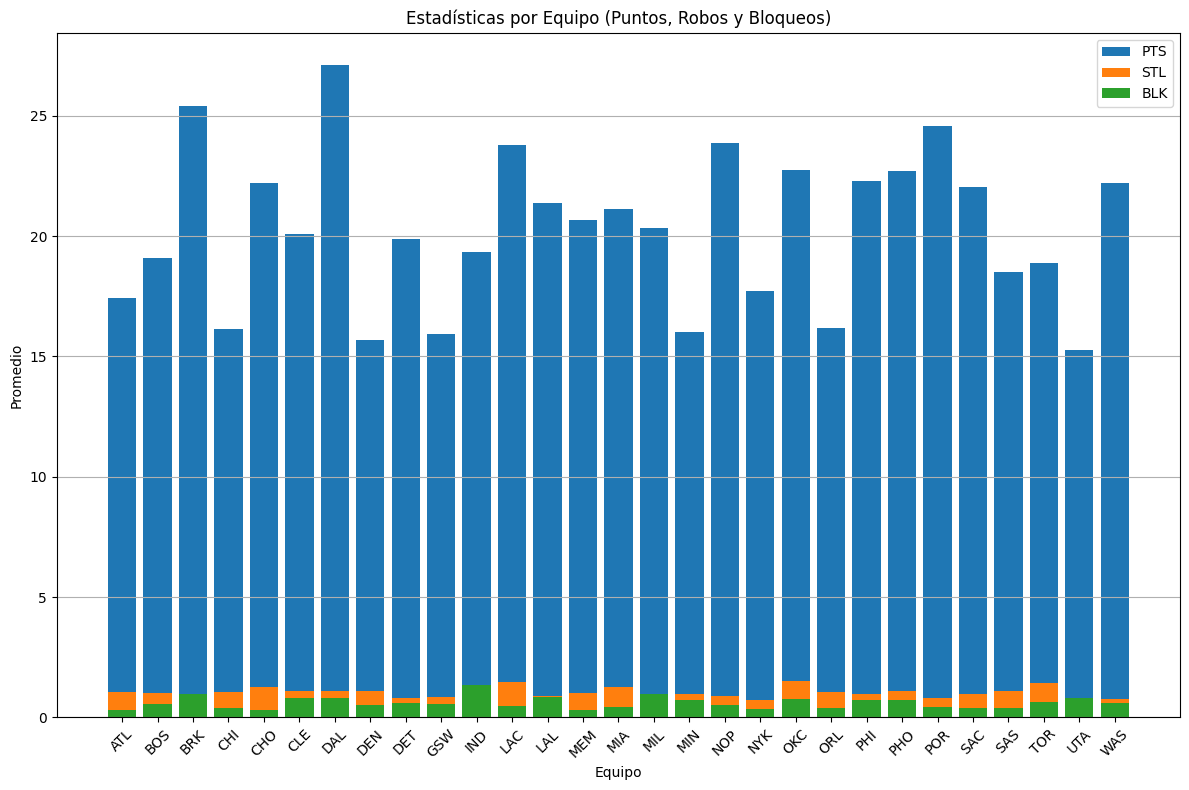

In [14]:
import matplotlib.pyplot as plt

# Seleccionar las estadísticas a incluir en la gráfica
stats = ['PTS', 'STL', 'BLK']

# Calcular el promedio de cada estadística por equipo
team_stats = df_exploded.groupby('Team_Split')[stats].mean()

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Para cada estadística, agregar una barra para cada equipo
for i, stat in enumerate(stats):
    plt.bar(team_stats.index, team_stats[stat], label=stat)

# Configurar la leyenda y las etiquetas de los ejes
plt.xlabel('Equipo')
plt.ylabel('Promedio')
plt.title('Estadísticas por Equipo (Puntos, Robos y Bloqueos)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar la gráfica
plt.savefig('estadisticas por equipo')
plt.show()


salarios por equipos

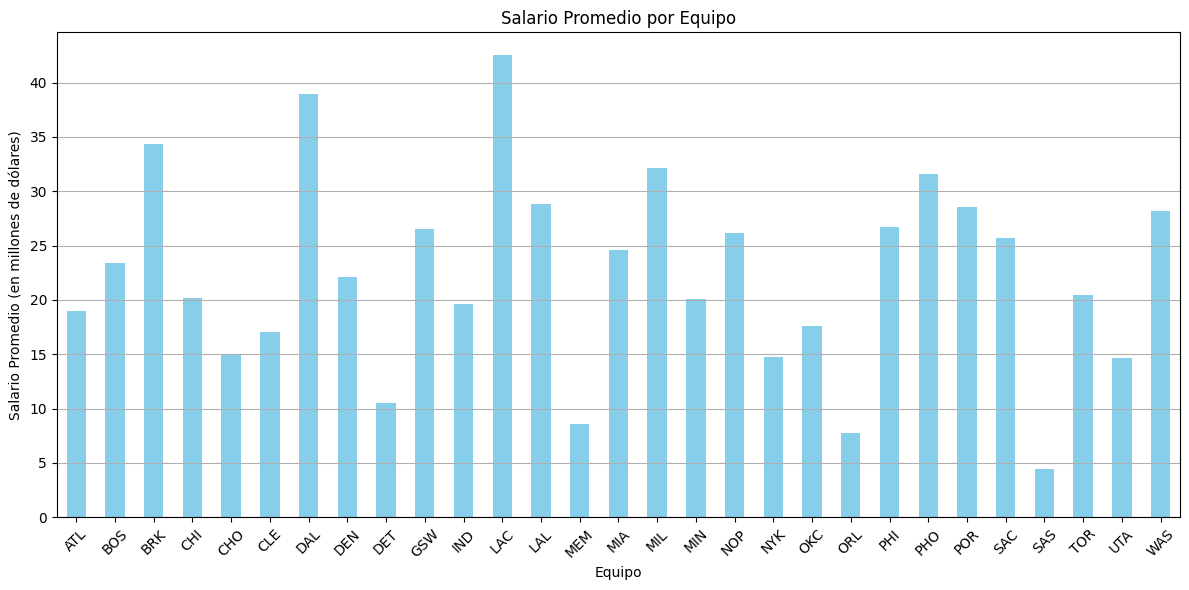

In [13]:
import matplotlib.pyplot as plt

# Calcular el salario promedio por equipo y convertirlo a millones de dólares
average_salary_by_team = df_exploded.groupby('Team_Split')['Salary'].mean() / 1000000

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
average_salary_by_team.plot(kind='bar', color='skyblue')
plt.xlabel('Equipo')
plt.ylabel('Salario Promedio (en millones de dólares)')
plt.title('Salario Promedio por Equipo')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('salarios por equipos')
plt.show()

